# US Net Positive Trend
Notebook to compute the total number of positive cases active in the US.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
states = pd.read_csv("https://covidtracking.com/api/states/daily.csv")
states['date'] = pd.to_datetime(states['date'],format='%Y%m%d')

In [3]:
states.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'],
      dtype='object')

In [4]:
trends = states.groupby('date').agg({'deathIncrease': sum, 'hospitalizedIncrease': sum, 'negativeIncrease': sum, 'positiveIncrease': sum, 'recovered': sum})

In [5]:
trends['deaths'] = trends['deathIncrease'].cumsum()
trends['cases'] = trends['positiveIncrease'].cumsum()
trends['positive'] = trends['cases'] - trends['deaths'] - trends['recovered']
trends.head()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,recovered,deaths,cases,positive
date,,,,,,,,
2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,1.0,0.0,0.0,9.0,0.0,1.0,9.0,8.0
2020-03-01,3.0,0.0,0.0,12.0,0.0,4.0,21.0,17.0
2020-03-02,3.0,0.0,0.0,13.0,0.0,7.0,34.0,27.0
2020-03-03,3.0,0.0,6.0,41.0,0.0,10.0,75.0,65.0


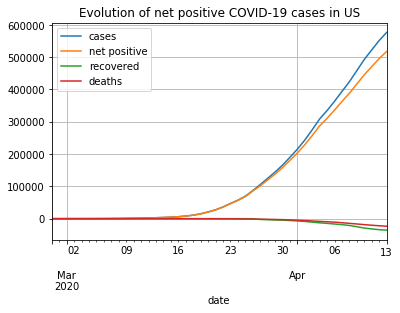

In [8]:
trends['cases'].plot(label='cases')
trends['positive'].plot(label='net positive')
(-trends['recovered']).plot(label='recovered')
(-trends['deaths']).plot(label='deaths')
plt.legend()
plt.grid()
plt.title('Evolution of net positive COVID-19 cases in US');